# POPULATION ANALYSIS USING SQL

### Aim: To analyze the common factors Affecting Population and see which has the highest bearing

In [1]:
#import necessary libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create helper functions to aid analysis

db = 'factbook.db'
def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)
    
def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)
    
def show_table():
    q = '''SELECT name,
                  type
           FROM sqlite_master
           WHERE type IN ('table', 'view')
            '''
    return run_query(q)

In [3]:
show_table()

,name,type
0,facts,table
1,sqlite_sequence,table


In [4]:
q = '''SELECT * FROM facts
        '''
run_query(q)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21,2015-11-01 13:20:13.049627,2015-11-01 13:20:13.049627
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00,2015-11-01 13:20:18.233063,2015-11-01 13:20:18.233063
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80,2015-11-01 13:20:23.048753,2015-11-01 13:20:23.048753
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65,2015-11-01 13:20:28.186341,2015-11-01 13:20:28.186341
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56,2015-11-01 13:20:33.093597,2015-11-01 13:20:33.093597


#### The dataset is a table of 13 columns and 261 rows showing various characteristics of individual countries

In [5]:
data = run_query(q)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 13 columns):
id                   261 non-null int64
code                 261 non-null object
name                 261 non-null object
area                 249 non-null float64
area_land            246 non-null float64
area_water           243 non-null float64
population           242 non-null float64
population_growth    236 non-null float64
birth_rate           228 non-null float64
death_rate           228 non-null float64
migration_rate       223 non-null float64
created_at           261 non-null object
updated_at           261 non-null object
dtypes: float64(8), int64(1), object(4)
memory usage: 26.6+ KB


In [6]:
data.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [7]:
#Select countries with the top 20 population count, excluding the 'world' and 'European Union' poulation as these are not countries
q_1 = '''SELECT *
       FROM facts
       WHERE name != 'World' AND name != 'European Union'
       ORDER BY population DESC
       LIMIT 20
        '''
top_20_populated_countries = run_query(q_1)
top_20_populated_countries

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,37,ch,China,9596960,9326410.0,270550,1367485388,0.45,12.49,7.53,0.44,2015-11-01 13:22:53.813142,2015-11-01 13:22:53.813142
1,77,in,India,3287263,2973193.0,314070,1251695584,1.22,19.55,7.32,0.04,2015-11-01 13:26:24.788193,2015-11-01 13:26:24.788193
2,186,us,United States,9826675,9161966.0,664709,321368864,0.78,12.49,8.15,3.86,2015-11-01 13:35:14.898271,2015-11-01 13:35:14.898271
3,78,id,Indonesia,1904569,1811569.0,93000,255993674,0.92,16.72,6.37,1.16,2015-11-01 13:26:30.435758,2015-11-01 13:26:30.435758
4,24,br,Brazil,8515770,8358140.0,157630,204259812,0.77,14.46,6.58,0.14,2015-11-01 13:21:42.799461,2015-11-01 13:21:42.799461
5,132,pk,Pakistan,796095,770875.0,25220,199085847,1.46,22.58,6.49,1.54,2015-11-01 13:30:54.514863,2015-11-01 13:30:54.514863
6,129,ni,Nigeria,923768,910768.0,13000,181562056,2.45,37.64,12.90,0.22,2015-11-01 13:30:39.695455,2015-11-01 13:30:39.695455
7,14,bg,Bangladesh,148460,130170.0,18290,168957745,1.60,21.14,5.61,0.46,2015-11-01 13:20:52.753843,2015-11-01 13:20:52.753843
8,143,rs,Russia,17098242,16377742.0,720500,142423773,0.04,11.60,13.69,1.69,2015-11-01 13:31:49.438160,2015-11-01 13:31:49.438160
9,85,ja,Japan,377915,364485.0,13430,126919659,0.16,7.93,9.51,0.00,2015-11-01 13:27:08.040081,2015-11-01 13:27:08.040081


In [8]:
#Create and show a new column, ppm, which is the population in millions
q_2 = '''SELECT name, 
                population, 
                (population / 1000000) ppm
         FROM facts
         WHERE name != 'World' AND name != 'European Union'
         ORDER BY population DESC
         LIMIT 10
            '''
top_10_populated_countries = run_query(q_2)
top_10_populated_countries

,name,population,ppm
0,China,1367485388,1367
1,India,1251695584,1251
2,United States,321368864,321
3,Indonesia,255993674,255
4,Brazil,204259812,204
5,Pakistan,199085847,199
6,Nigeria,181562056,181
7,Bangladesh,168957745,168
8,Russia,142423773,142
9,Japan,126919659,126


### Cleaned this dataset by removing countries in the top ten that are not actually countries. These are 'world' and 'European Union', i guess they can be attributed to human error as these are not countries

Text(0.5, 1.07, 'Bar Plot Of The Top Ten Countries in the World')

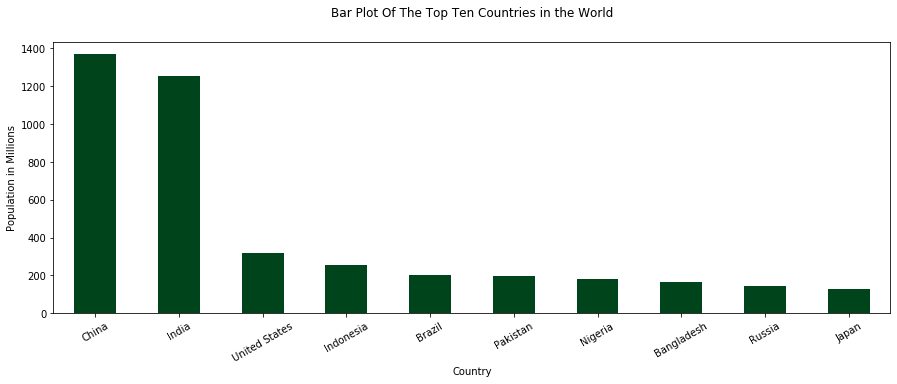

In [9]:
top_10_populated_countries.plot(kind = 'bar',
                                x = 'name',
                                y = 'ppm',
                                rot = 30,
                                legend = False,
                                colormap = plt.cm.BuGn_r,
                                figsize = (15,5)
                                )
plt.ylabel('Population in Millions')
plt.xlabel('Country')
plt.title('Bar Plot Of The Top Ten Countries in the World', y = 1.07)

Text(73.76, 0.5, '')

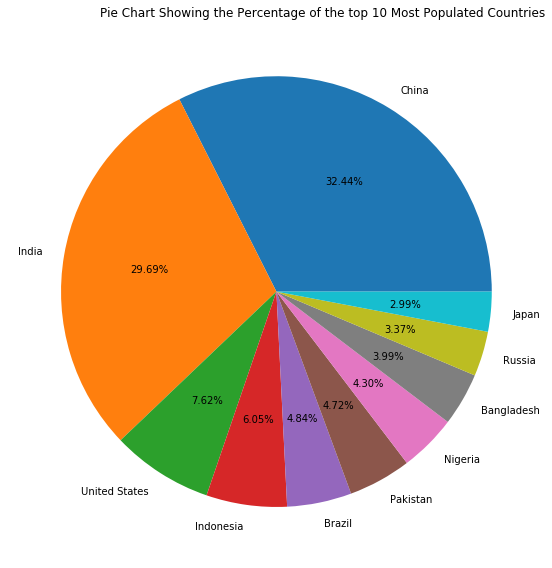

In [10]:
top_10_populated_countries[['name', 'ppm']].plot(kind = 'pie',
                                            y = 'ppm',
                                            autopct = '%.2f%%',
                                            figsize = (8,8),
                                            legend = False,
                                            labels= ['China','India','United States','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Russia','Japan']
                                                )
plt.title('Pie Chart Showing the Percentage of the top 10 Most Populated Countries', loc = 'right')
plt.tight_layout()
plt.ylabel('')

### From the plots above we see China and India have at least four times the population of the remaining top 8 countries which is Amazing

In [11]:
q_3 = '''SELECT name country,
                population,
                population_growth,
                birth_rate,
                death_rate,
                migration_rate
         FROM facts
         WHERE name != 'World' AND name!= 'European Union'
         ORDER BY population DESC
         LIMIT 10
            '''
run_query(q_3)

,country,population,population_growth,birth_rate,death_rate,migration_rate
0,China,1367485388,0.45,12.49,7.53,0.44
1,India,1251695584,1.22,19.55,7.32,0.04
2,United States,321368864,0.78,12.49,8.15,3.86
3,Indonesia,255993674,0.92,16.72,6.37,1.16
4,Brazil,204259812,0.77,14.46,6.58,0.14
5,Pakistan,199085847,1.46,22.58,6.49,1.54
6,Nigeria,181562056,2.45,37.64,12.90,0.22
7,Bangladesh,168957745,1.60,21.14,5.61,0.46
8,Russia,142423773,0.04,11.60,13.69,1.69
9,Japan,126919659,0.16,7.93,9.51,0.00


Decided to write this query first to aid the reader in understanding how the more complex query below was written

In [12]:
q_4 = ''' SELECT * FROM (SELECT name country,
                population,
                population_growth,
                birth_rate,
                death_rate,
                migration_rate,
                population / 1000000 ppm
         FROM facts
         WHERE name != 'World' AND name!= 'European Union' AND ppm > 0
         ORDER BY population DESC
         LIMIT 100)
           ORDER BY ppm ASC
            '''
run_query(q_4).head(15)

,country,population,population_growth,birth_rate,death_rate,migration_rate,ppm
0,Togo,7552318,2.69,34.13,7.26,0.00,7
1,Bulgaria,7186893,0.58,8.92,14.44,0.29,7
2,Honduras,8746673,1.68,23.14,5.17,1.16,8
3,Austria,8665550,0.55,9.41,9.42,5.56,8
4,Tajikistan,8191958,1.71,24.38,6.18,1.15,8
5,Switzerland,8121830,0.71,10.50,8.13,4.74,8
6,Jordan,8117564,0.83,25.37,3.79,13.24,8
7,Israel,8049314,1.56,18.48,5.15,2.24,8
8,Hungary,9897541,0.22,9.16,12.73,1.33,9
9,Sweden,9801616,0.80,11.99,9.40,5.42,9


### The data was 'segmented' in such a way as to cater for countries that were wrongly inputed as countries. Examples are European Union and World. I also used the condition of removing countries with population(ppm) less than one million.

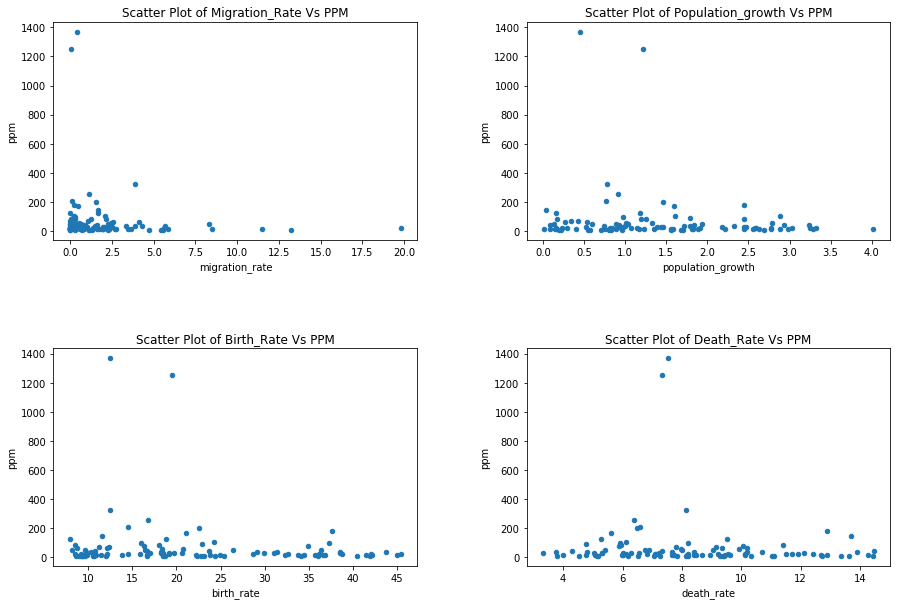

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)

#top left
run_query(q_4).plot(kind = 'scatter',
                    ax = ax1,
                    x = 'migration_rate',
                    y = 'ppm',
                   title = 'Scatter Plot of Migration_Rate Vs PPM')

#top right
run_query(q_4).plot(kind = 'scatter',
                    ax = ax2,
                    x = 'population_growth',
                    y = 'ppm',
                   title = 'Scatter Plot of Population_growth Vs PPM')

#Bottom left
run_query(q_4).plot(kind = 'scatter',
                    ax = ax3,
                    x = 'birth_rate',
                    y = 'ppm',
                   title = 'Scatter Plot of Birth_Rate Vs PPM')

#Bottom right
run_query(q_4).plot(kind = 'scatter',
                    ax = ax4,
                    x = 'death_rate',
                    y = 'ppm',
                   title = 'Scatter Plot of Death_Rate Vs PPM')

plt.show()
#PPM means Population Per Million

#### From the result above, there is a positive correlation between these factors(migration rate, birth rate, population growth and death rate) and the Population of a country. 

#### But, of all of these factors, the migration_rate stands out. The plot(top left) shows us that, majority of the nations with small population have low migration rate. We cannot draw any significant inference because we are not sure if these are immigrants or emigrants

In [14]:
#close connection
conn = sqlite3.connect(db)
conn.close()

# Conclusion

### We can see that migration rate according to the data provided is one factor that stands out among the factors affecting population in the world